## Context

Data was collected from the Taiwan Economic Journal from 1999 to 2009. This data spans across 95 separate features that could impact bankruptcy. Company bankruptcy was defined from the Taiwan Stock Exchange business regulations.

Companies in operation have a very complex network of activities and metrics to keep track of. Money is flowing in and out at varying rates, all influenced by multiple external factors. These metrics/features encompass values like asset and captital turnover, inventory value, operating profit, etc. It's possible that these factors, along with labeled bank data, can train a predictive classification model.

As the data this model is based on is from companies restricted to the business regulations of the Taiwan Stock Exchange, the insights extracted from this model are a preliminary proof of concept that can be applied to other companies in Taiwan or other areas with similar regulations.

## Objective

The objective of this modeling project is to determine the factors/characteristics that correlate with non-bankruptcy for companies running in Taiwan's economy and regulations. This model aims to provide a baseline projection check for companies to predict whether their current operations will lead to bankruptcy or not.

## Data Dictionary

There are a total of 96 factors in this dataset, the names of which are descriptive as is.


*   Bankrupt? - target that labels specific bank as bankrupt or not



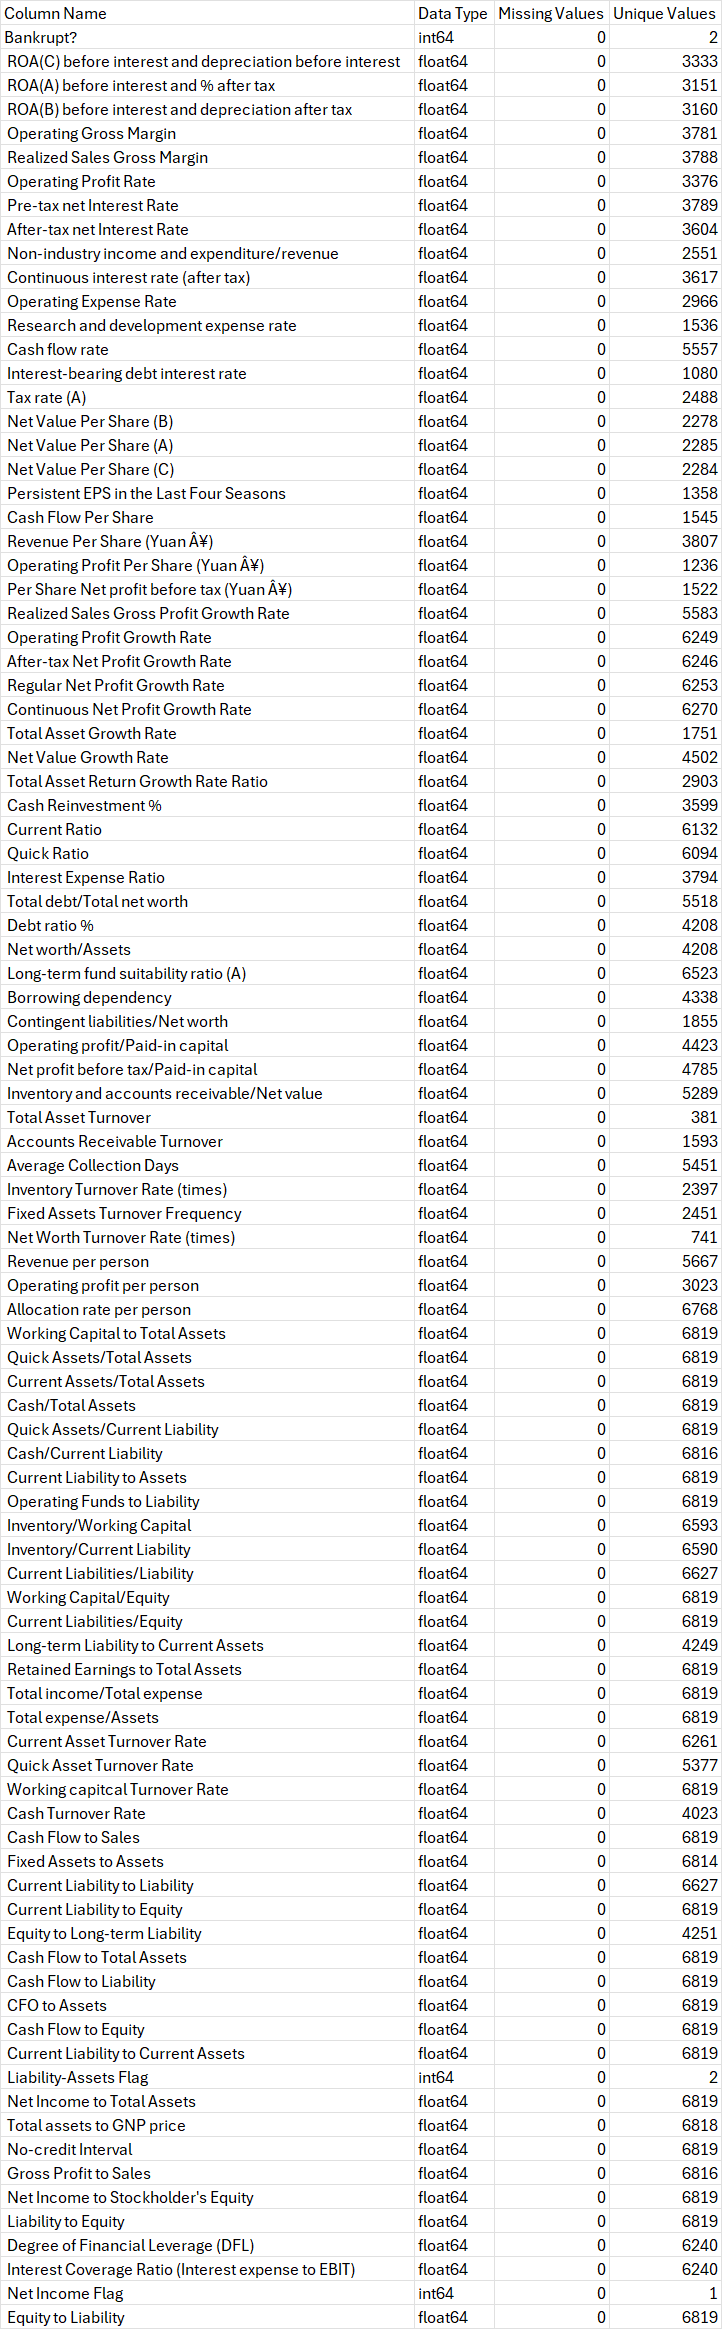

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
import xgboost as xgb

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeCV

from sklearn import metrics
from sklearn.metrics import r2_score

# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
# Load the data (alternative)
file_path = 'data.csv'
df = pd.read_csv(file_path)

In [ ]:
# Create the data dictionary
data_dictionary = {
    'Column Name': df.columns.tolist(),  # Convert column names to a list for better readability
    'Data Type': df.dtypes.tolist(),  # Convert data types to a list
    'Missing Values': df.isnull().sum().tolist(),  # Sum and convert missing values to a list
    'Unique Values': df.nunique().tolist()  # Convert unique value counts to a list
}

# Turn data dictionary into DataFrame
data_dict_df = pd.DataFrame(data_dictionary)

# Save the DataFrame to a CSV file
data_dict_df.to_csv('data_dictionary.csv', index=False)


## Exploratory Data Analysis

In [ ]:
# Viewing the dataset
df.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [ ]:
df.tail()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
6814                      0.809331   
6815                      0.809327   
6816                      0.809317   
6817                      0.809399   
6818                      0.813800   

       Non-industry income and expenditure/revenue  ...  \
6814                                      0.303510  ...   
6815                                      0.303520  ...   
6816                                      0.303512  ...   
6817                                      0.303498  ...   
6818                                      0.313415  ...   

       Net Income to Total Assets   Total assets to GNP price  \
6814                     0.799927                    0.000466   
6815                     0.799748                    0.001959   
6816                     0.797778                    0.002840   
6817                     0.811808                    0.002837   
6818                     0.815956                    0.000707   

       No-credit Interval   Gross Profit to Sales  \
6814             0.623620                0.604455   
6815             0.623931                0.598306   
6816             0.624156                0.610441   
6817             0.623957                0.607846   
6818             0.626680                0.627408   

       Net Income to Stockholder's Equity   Liability to Equity  \
6814                             0.840359              0.279606   
6815                             0.840306              0.278132   
6816                             0.840138              0.275789   
6817                             0.841084              0.277547   
6818                             0.841019              0.275114   

       Degree of Financial Leverage (DFL)  \
6814                             0.027064   
6815                             0.027009   
6816                             0.026791   
6817                             0.026822   
6818                             0.026793   

       Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
6814                                           0.566193                   1   
6815                 

Column names have leading spaces, need to adjust

In [ ]:
df.rename(columns=lambda x: x.strip(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2   ROA(A) before interest and % after tax                   6819 non-null   float64
 3   ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-tax net Interest Rate                                6819 non-null   float64
 8   After-tax net Interest Rate 

There are no null values in this dataset!

In [ ]:
# Viewing shape of the data
df.shape

(6819, 96)

In [ ]:
df.describe().T

count      mean  \
Bankrupt?                                           6819.0  0.032263   
ROA(C) before interest and depreciation before ...  6819.0  0.505180   
ROA(A) before interest and % after tax              6819.0  0.558625   
ROA(B) before interest and depreciation after tax   6819.0  0.553589   
Operating Gross Margin                              6819.0  0.607948   
...                                                    ...       ...   
Liability to Equity                                 6819.0  0.280365   
Degree of Financial Leverage (DFL)                  6819.0  0.027541   
Interest Coverage Ratio (Interest expense to EBIT)  6819.0  0.565358   
Net Income Flag                                     6819.0  1.000000   
Equity to Liability                                 6819.0  0.047578   

                                                         std  min       25%  \
Bankrupt?                                           0.176710  0.0  0.000000   
ROA(C) before interest and depreciation before ...  0.060686  0.0  0.476527   
ROA(A) before interest and % after tax              0.065620  0.0  0.535543   
ROA(B) before interest and depreciation after tax   0.061595  0.0  0.527277   
Operating Gross Margin                              0.016934  0.0  0.600445   
...                                                      ...  ...       ...   
Liability to Equity                                 0.014463  0.0  0.276944   
Degree of Financial Leverage (DFL)                  0.015668  0.0  0.026791   
Interest Coverage Ratio (Interest expense to EBIT)  0.013214  0.0  0.565158   
Net Income Flag                                     0.000000  1.0  1.000000   
Equity to Liability                                 0.050014  0.0  0.024477   

                                                         50%       75%  max  
Bankrupt?                                           0.000000  0.000000  1.0  
ROA(C) before interest and depreciation before ...  0.502706  0.535563  1.0  
ROA(A) before interest and % after tax              0.559802  0.589157  1.0  
ROA(B) before interest and depreciation after tax   0.552278  0.584105  1.0  
Operating Gross Margin                              0.605997  0.613914  1.0  
...                                                      ...       ...  ...  
Liability to Equity                                 0.278778  0.281449  1.0  
Degree of Financial Leverage (DFL)                  0.026808  0.026913  1.0  
Interest Coverage Ratio (Interest expense to EBIT)  0.565252  0.565725  1.0  
Net Income Flag                                     1.000000  1.000000  1.0  
Equity to Liability                                 0.033798  0.052838  1.0  

[96 rows x 8 columns]

In [ ]:
#checking for data redundancy
duplicate_data = df.duplicated().sum()
print("Duplicate data: ",duplicate_data)


Duplicate data:  0


There is no duplicated data!

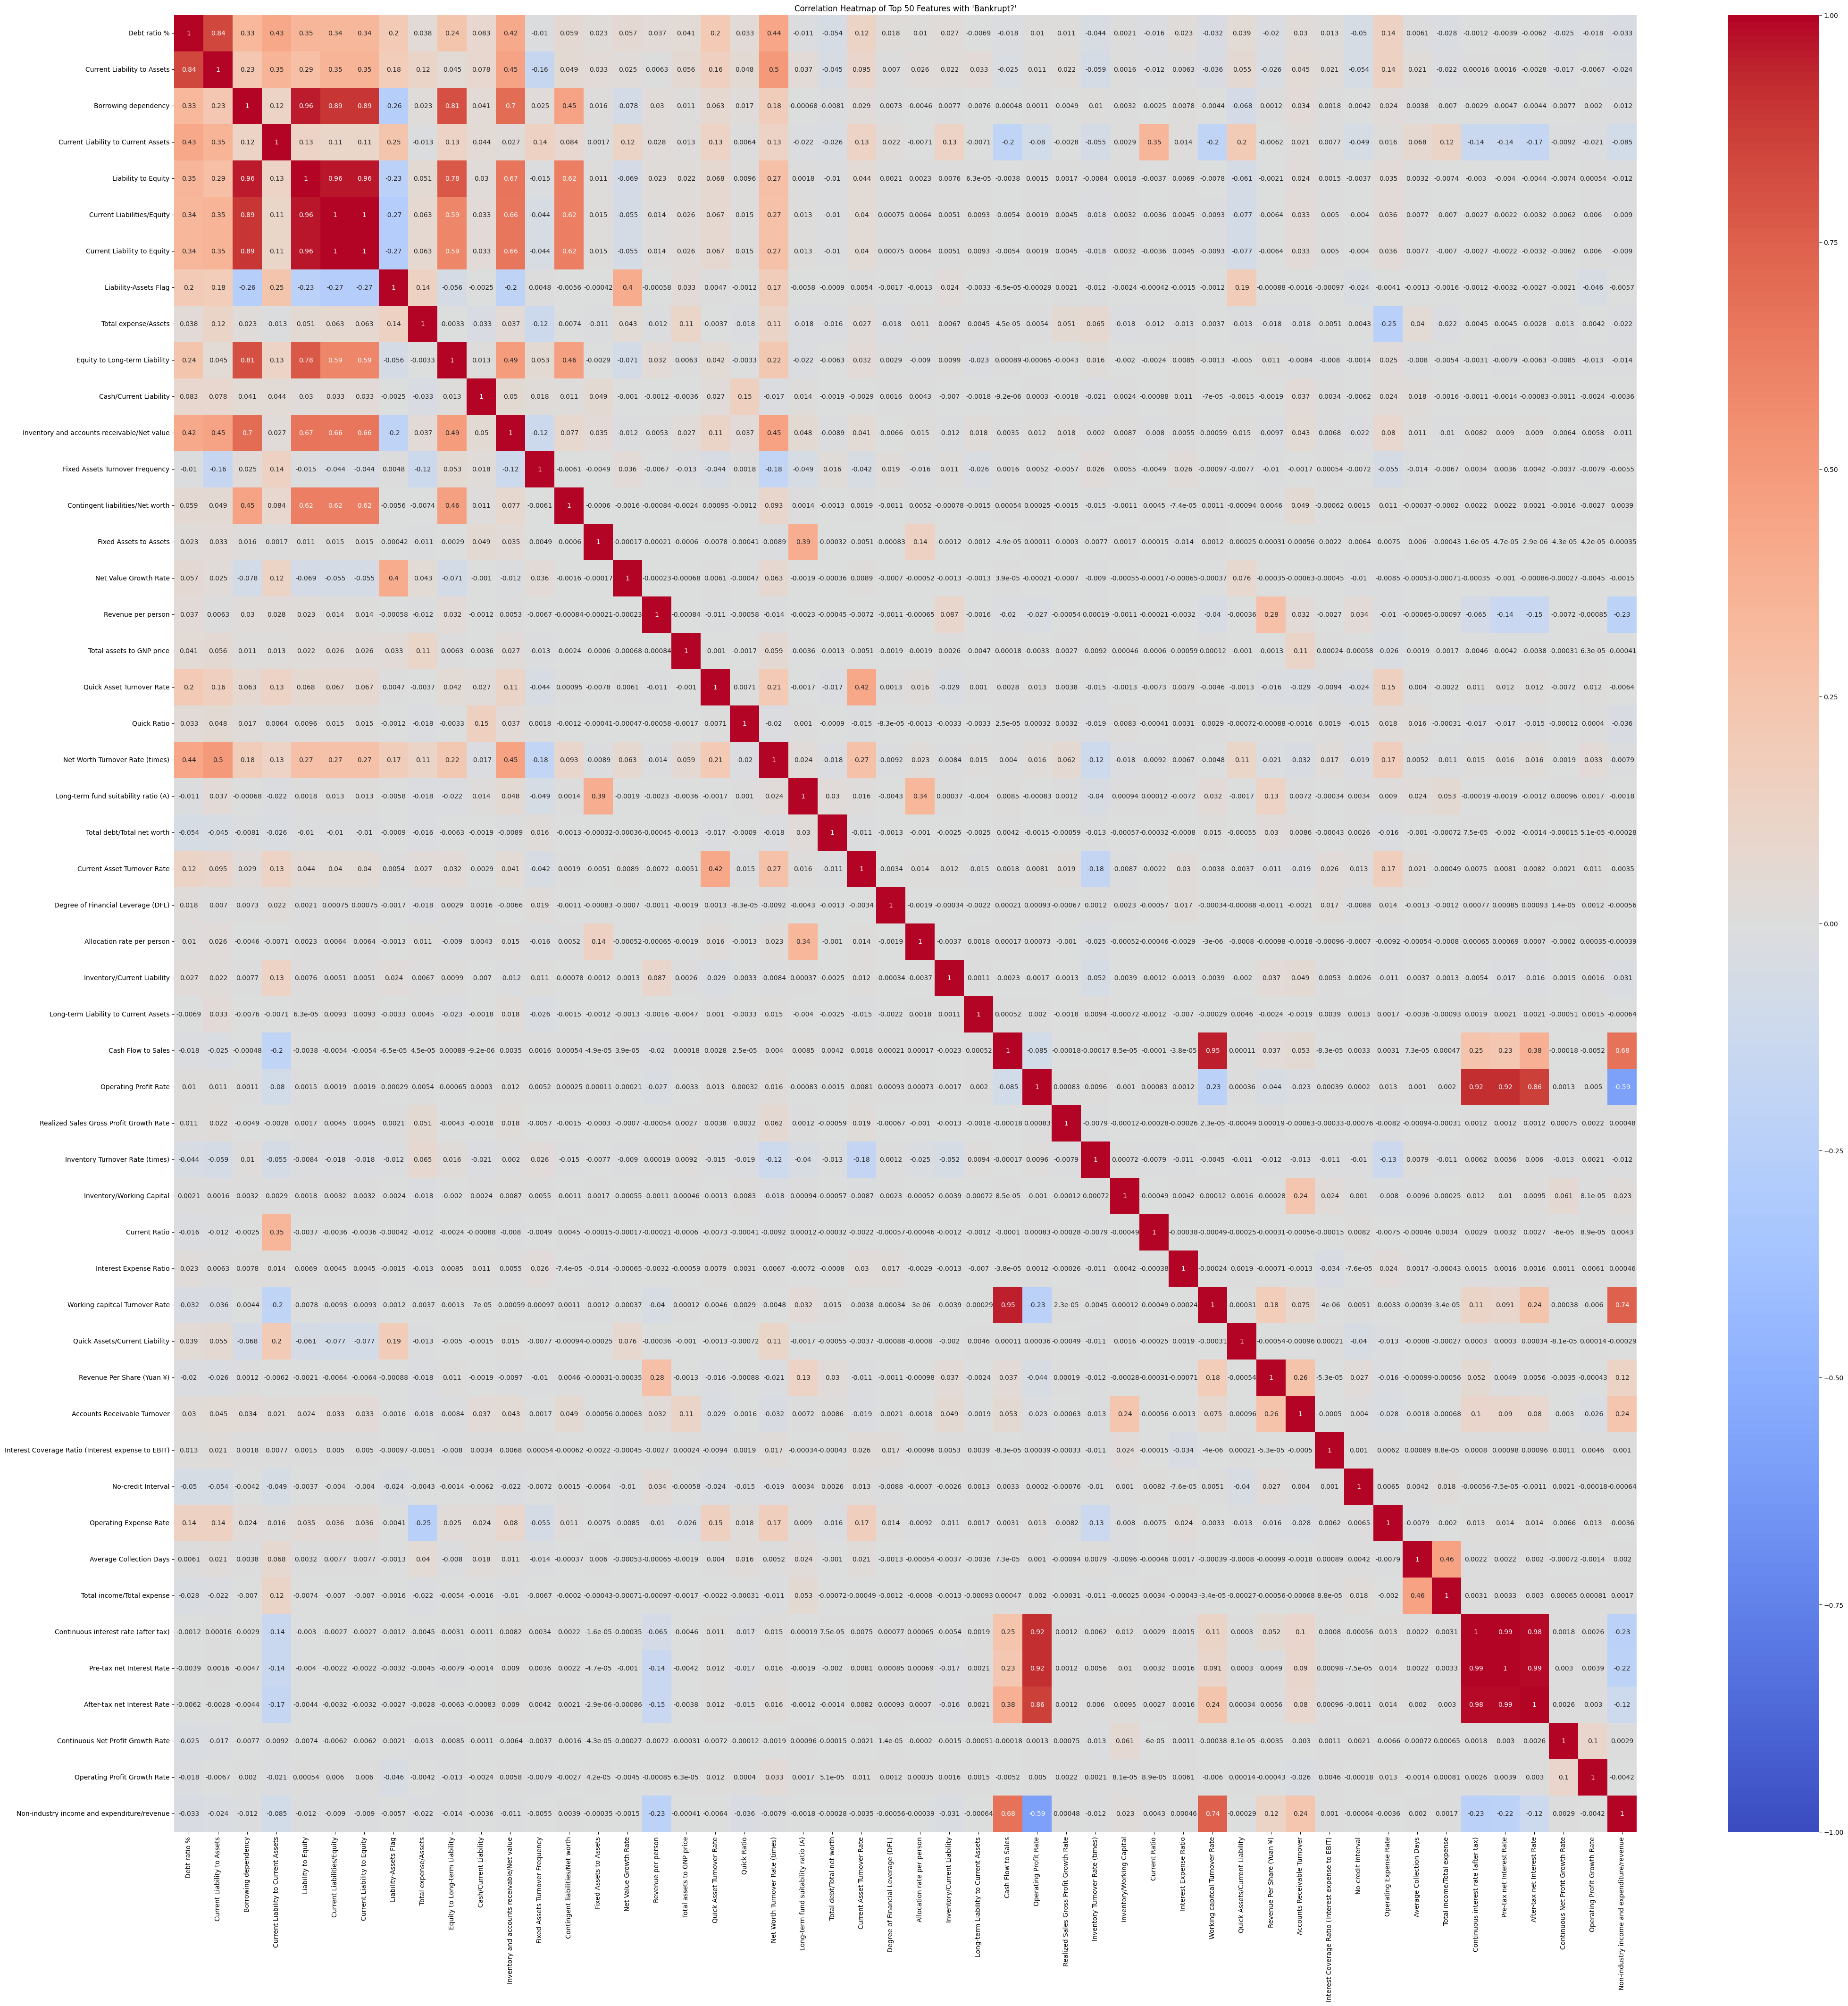

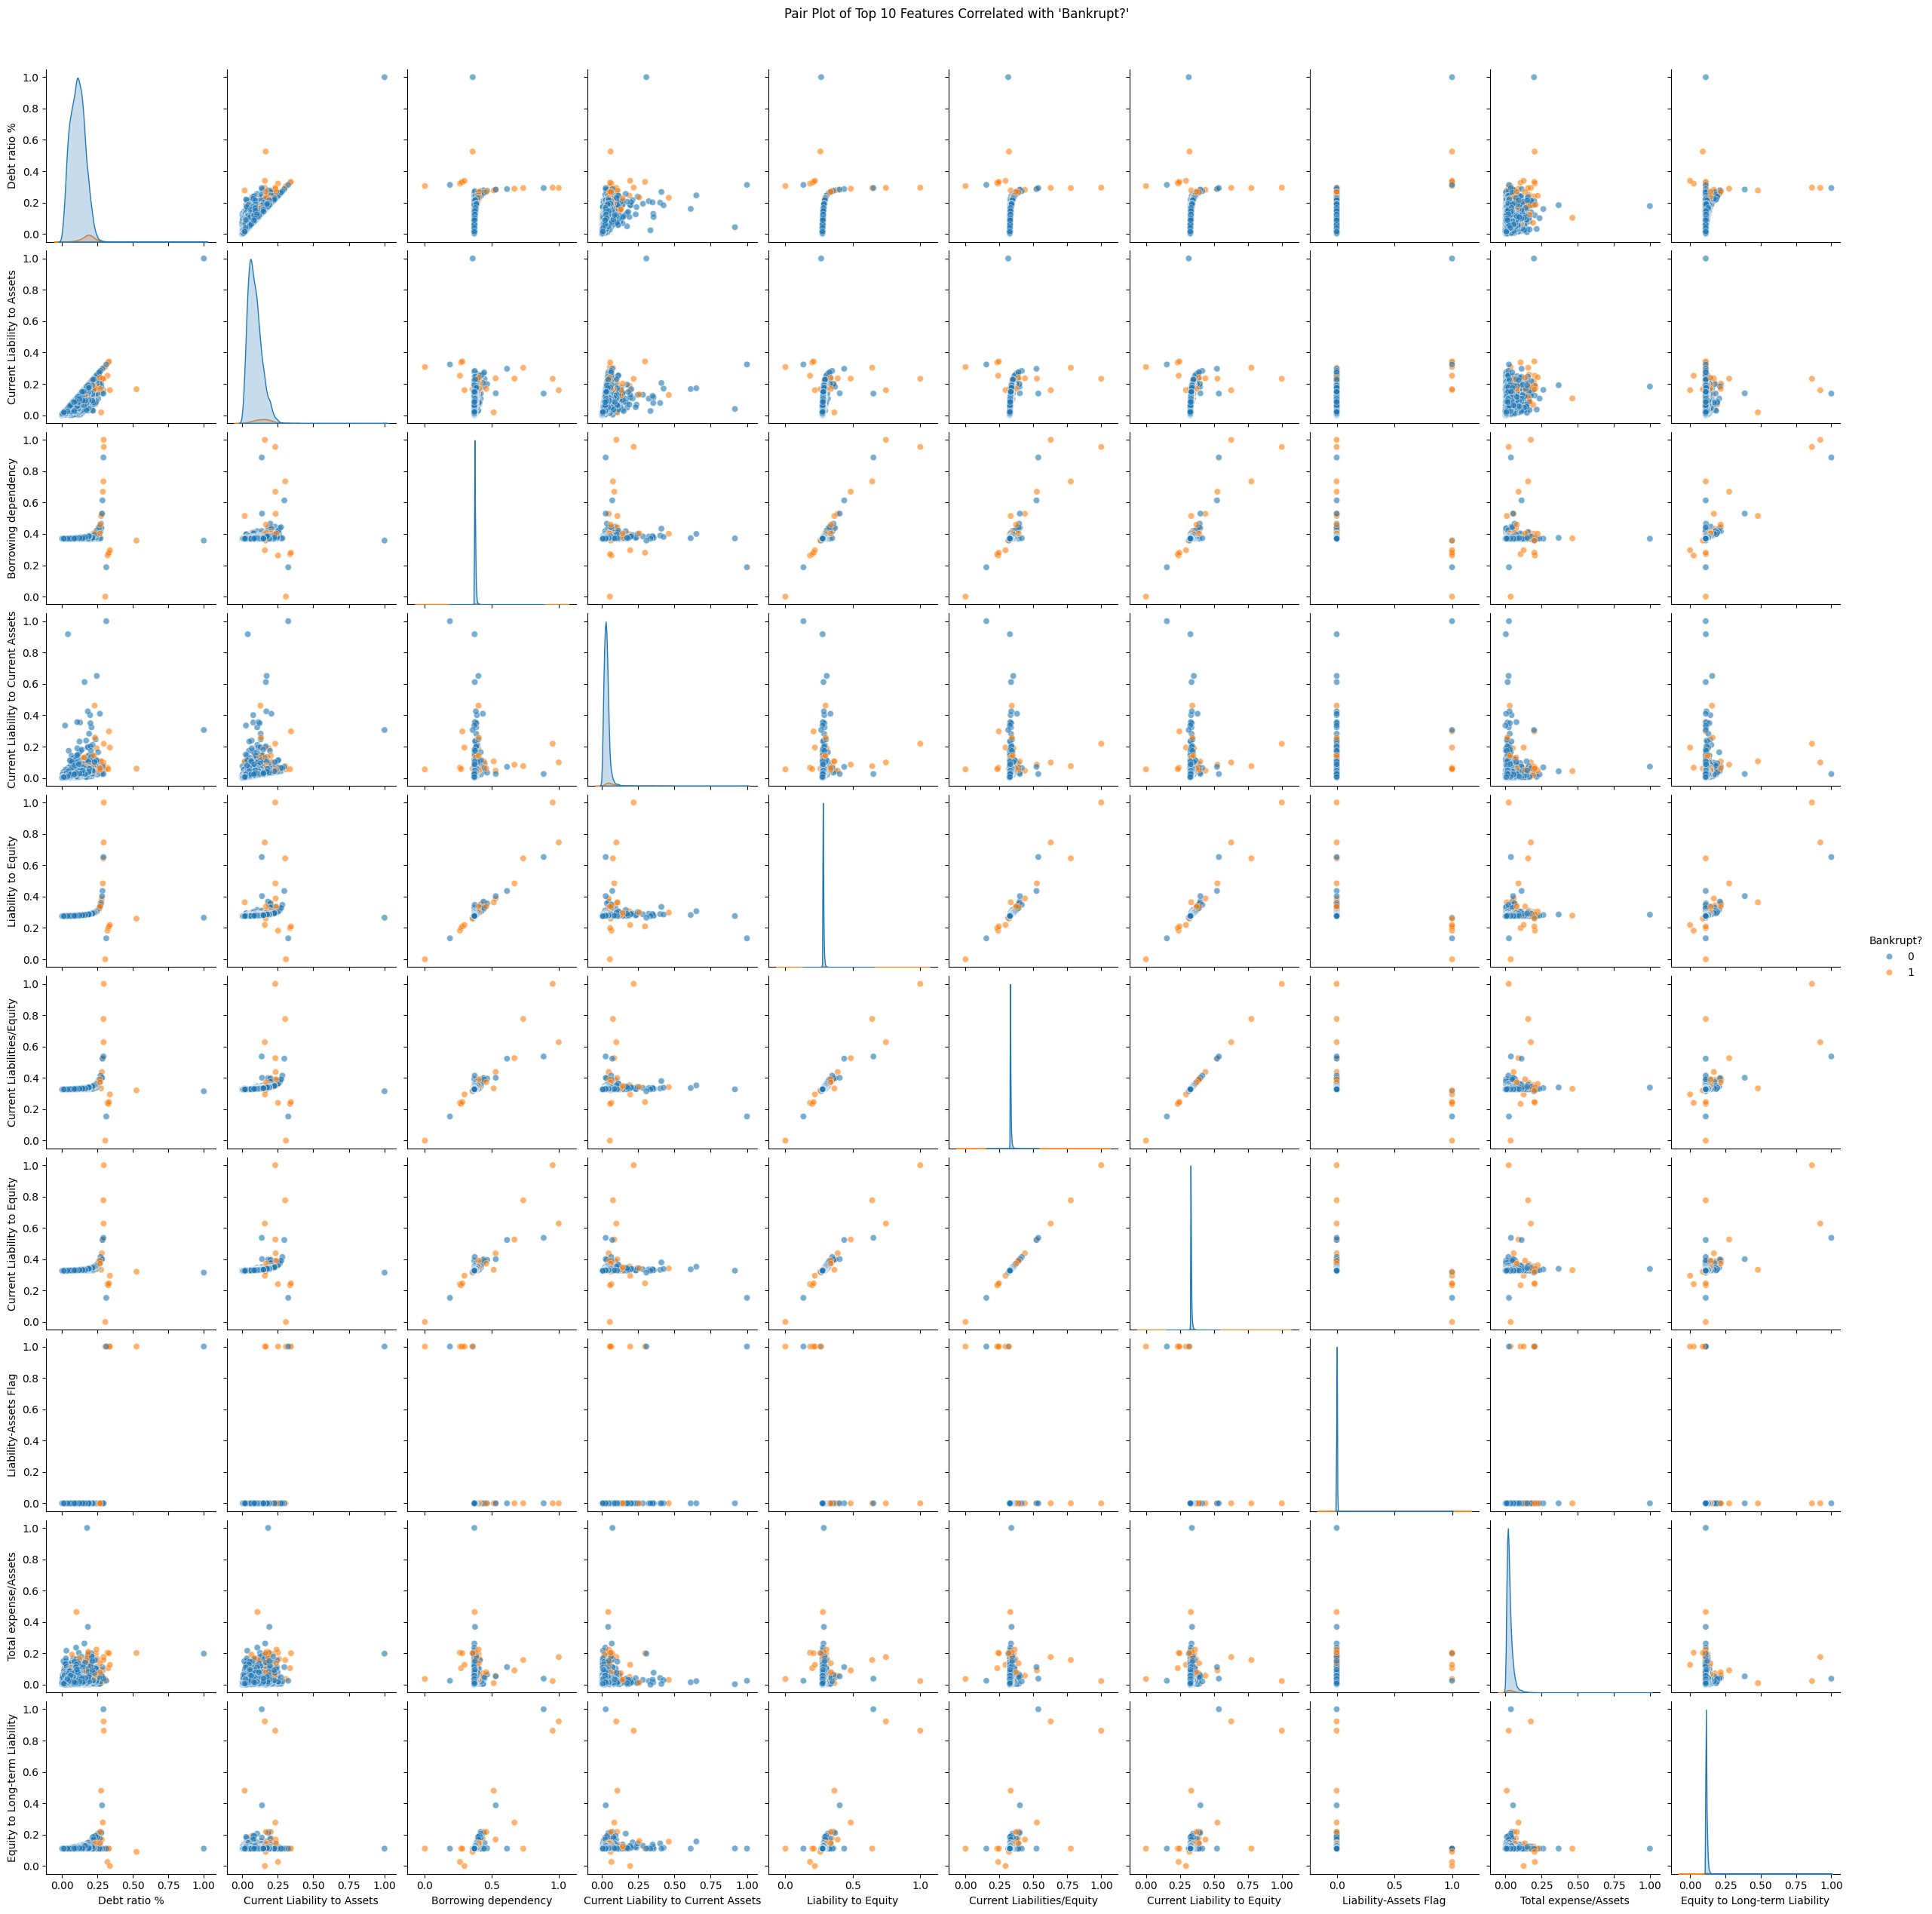

In [ ]:
# Compute the top correlated features with 'Bankrupt?'
correlations = df.corr()['Bankrupt?'].sort_values(ascending=False)
top_features = correlations[1:51].index  # Get the top 50 features, excluding 'Bankrupt?' itself

# Correlation Heatmap of Top 50 Features based on Correlation with Target Variable
plt.figure(figsize=(50, 50))
sns.heatmap(df[top_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Top 50 Features with 'Bankrupt?'")
plt.show()

# Pair Plot for the top 10 features correlated with 'Bankrupt?'
sns.pairplot(df, vars=top_features[:10], hue='Bankrupt?', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Top 10 Features Correlated with 'Bankrupt?'", y=1.02)
plt.show()

### View Target Distribution

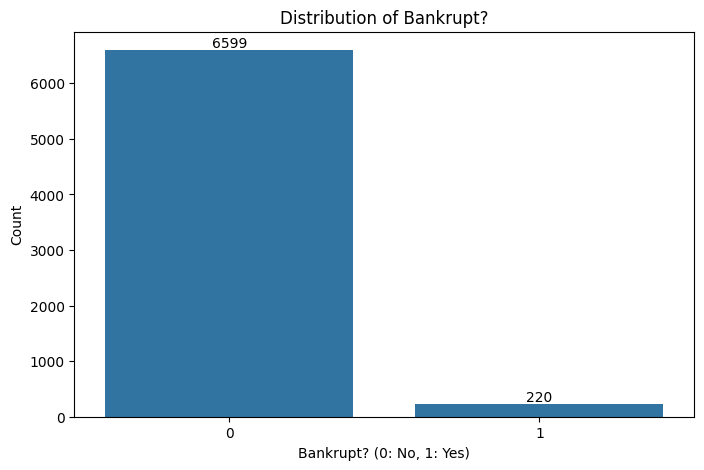

In [ ]:
# Analyze the distribution of the 'Bankrupt?' column to see the class balance
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Bankrupt?'], order=df['Bankrupt?'].value_counts(ascending=False).index)
plt.title("Distribution of Bankrupt?")
plt.xlabel("Bankrupt? (0: No, 1: Yes)")
plt.ylabel("Count")
abs_values = df['Bankrupt?'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

Class of interest is the rare class with total bankrupt instances only being 220 and total non-bankrupt instances being 6599.

### Exploration of top 10 most correlated factors to target
Chosen from features highlighted on produced pairplot

#### Debt Ratio %

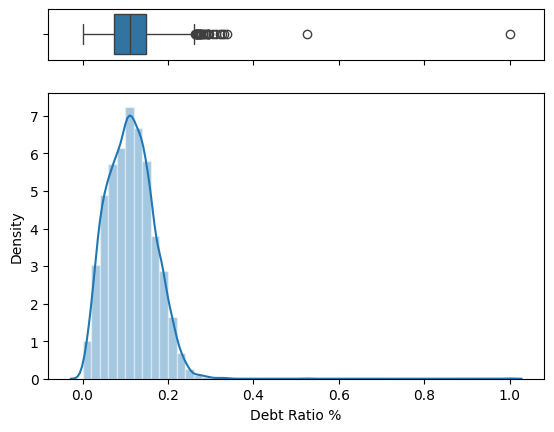

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Debt ratio %"], orient = 'h', ax=ax_box)
sns.distplot(df["Debt ratio %"], ax=ax_hist)
ax_hist.set(xlabel='Debt Ratio %')
plt.show()

Text(0.5, 1.0, 'Distribution of Debt ratio %, by Class')

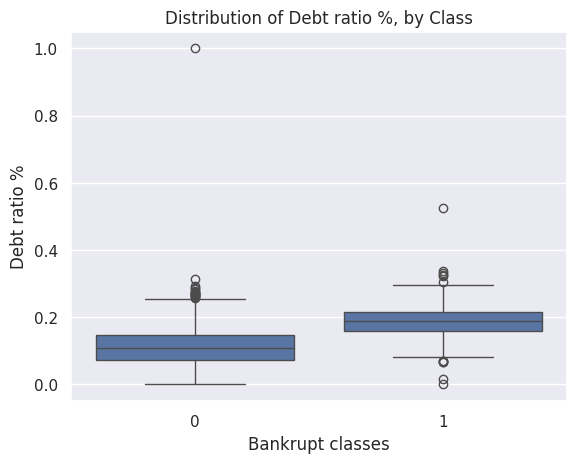

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Debt ratio %")
plt.xlabel("Bankrupt classes")
plt.ylabel("Debt ratio %")
plt.title("Distribution of Debt ratio %, by Class")

#### Current Liability to Assets

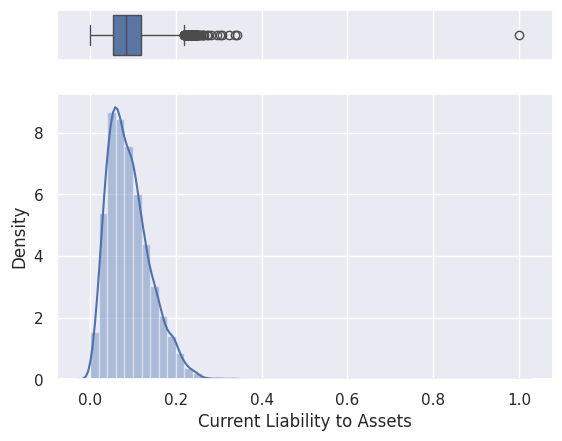

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Current Liability to Assets"], orient = 'h', ax=ax_box)
sns.distplot(df["Current Liability to Assets"], ax=ax_hist)
ax_hist.set(xlabel='Current Liability to Assets')
plt.show()

This variable is also skewed slightly right, but mostly falls within a tight range of 0-0.21

Text(0.5, 1.0, 'Distribution of Current Liability to Assets, by Class')

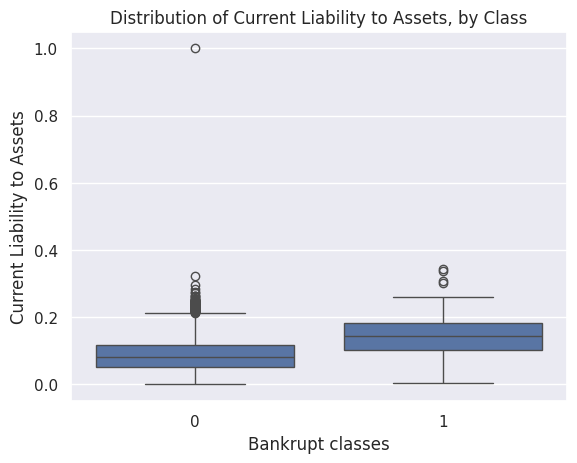

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Current Liability to Assets")
plt.xlabel("Bankrupt classes")
plt.ylabel("Current Liability to Assets")
plt.title("Distribution of Current Liability to Assets, by Class")

#### Borrowing Dependency

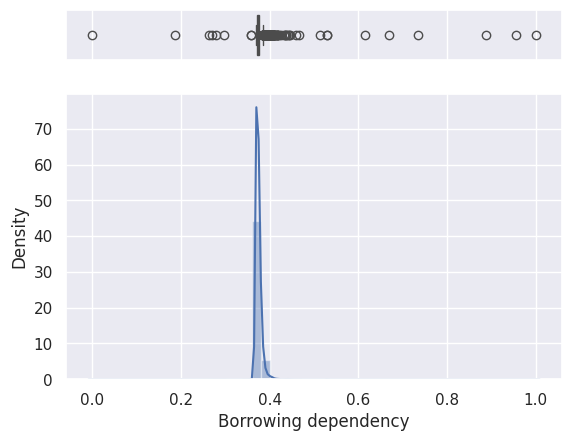

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Borrowing dependency"], orient = 'h', ax=ax_box)
sns.distplot(df["Borrowing dependency"], ax=ax_hist)
ax_hist.set(xlabel='Borrowing dependency')
plt.show()

Looks like this variable might only have a few distinct values

In [ ]:
df['Borrowing dependency'].value_counts()

Borrowing dependency
0.369637    1153
0.369639      15
0.369638      11
0.369653       7
0.369657       6
            ... 
0.384545       1
0.382657       1
0.391390       1
0.386246       1
0.374587       1
Name: count, Length: 4338, dtype: int64

This variable has many distinct variables, but only lies within a tight range with a few outliers.

Text(0.5, 1.0, 'Distribution of Borrowing dependency, by Class')

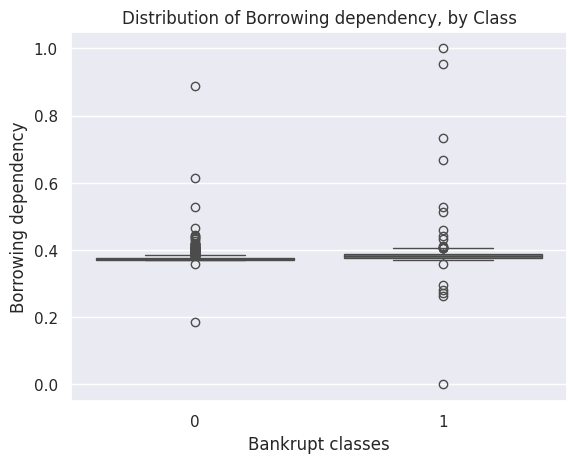

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Borrowing dependency")
plt.xlabel("Bankrupt classes")
plt.ylabel("Borrowing dependency")
plt.title("Distribution of Borrowing dependency, by Class")

#### Current Liability to Current Assets



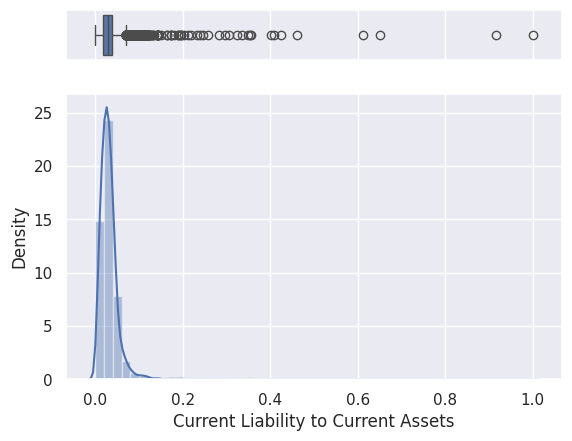

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Current Liability to Current Assets"], orient = 'h', ax=ax_box)
sns.distplot(df["Current Liability to Current Assets"], ax=ax_hist)
ax_hist.set(xlabel='Current Liability to Current Assets')
plt.show()

Text(0.5, 1.0, 'Distribution of Current Liability to Current Assets, by Class')

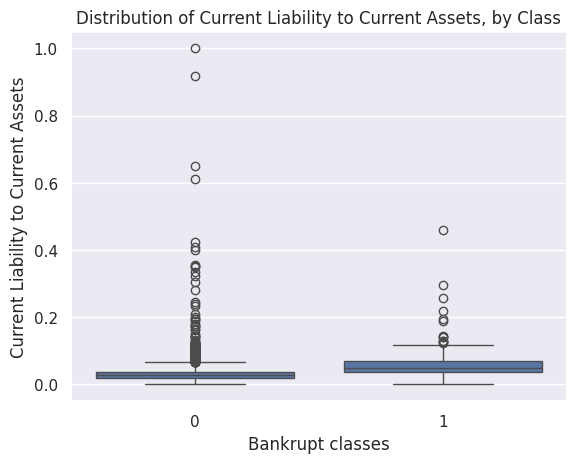

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Current Liability to Current Assets")
plt.xlabel("Bankrupt classes")
plt.ylabel("Current Liability to Current Assets")
plt.title("Distribution of Current Liability to Current Assets, by Class")

#### Liability to Equity

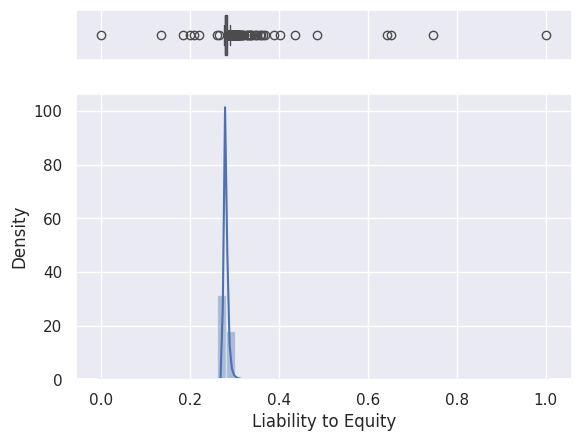

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Liability to Equity"], orient = 'h', ax=ax_box)
sns.distplot(df["Liability to Equity"], ax=ax_hist)
ax_hist.set(xlabel='Liability to Equity')
plt.show()

This variable has a very tight distribution as well

Text(0.5, 1.0, 'Distribution of Liability to Equity, by Class')

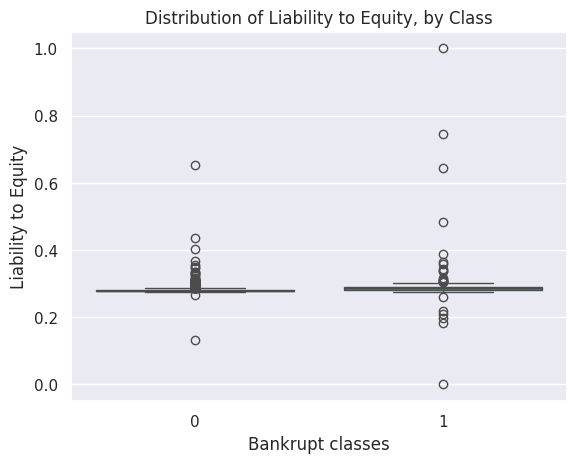

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Liability to Equity")
plt.xlabel("Bankrupt classes")
plt.ylabel("Liability to Equity")
plt.title("Distribution of Liability to Equity, by Class")

#### Current Liabilities/Equity

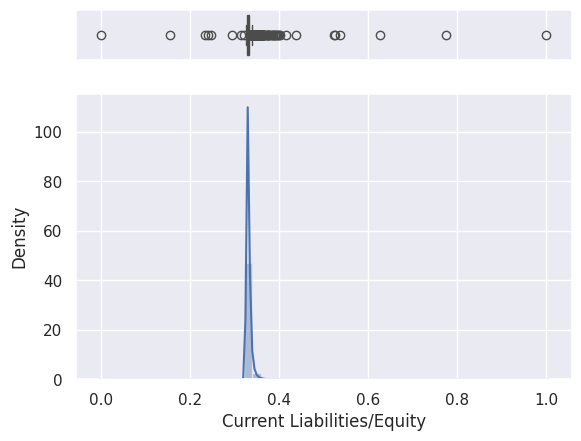

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Current Liabilities/Equity"], orient = 'h', ax=ax_box)
sns.distplot(df["Current Liabilities/Equity"], ax=ax_hist)
ax_hist.set(xlabel='Current Liabilities/Equity')
plt.show()

Text(0.5, 1.0, 'Distribution of Current Liabilities/Equity, by Class')

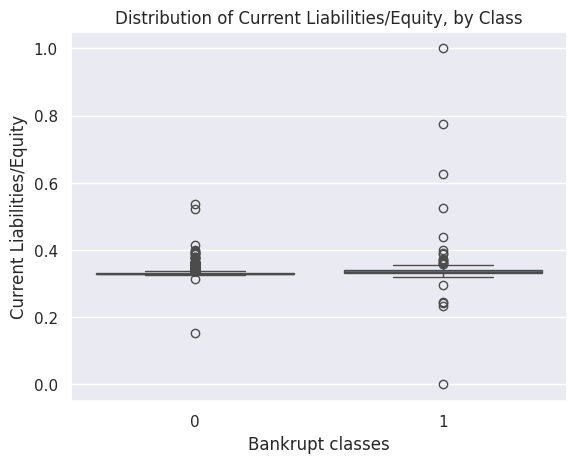

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Current Liabilities/Equity")
plt.xlabel("Bankrupt classes")
plt.ylabel("Current Liabilities/Equity")
plt.title("Distribution of Current Liabilities/Equity, by Class")

#### Current Liability to Equity

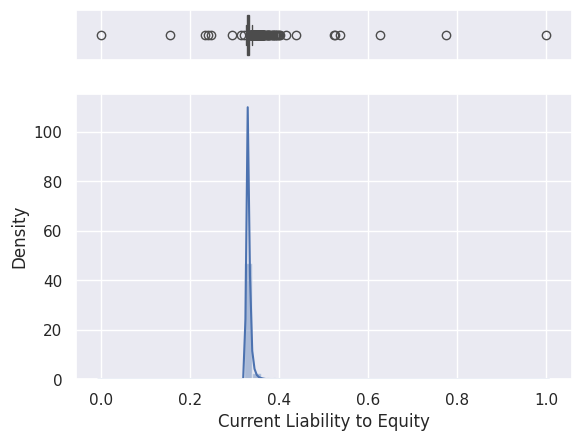

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Current Liability to Equity"], orient = 'h', ax=ax_box)
sns.distplot(df["Current Liability to Equity"], ax=ax_hist)
ax_hist.set(xlabel='Current Liability to Equity')
plt.show()

Text(0.5, 1.0, 'Distribution of Current Liability to Equity, by Class')

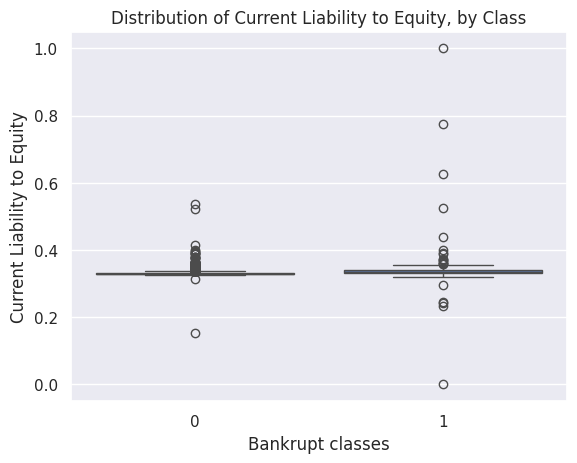

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Current Liability to Equity")
plt.xlabel("Bankrupt classes")
plt.ylabel("Current Liability to Equity")
plt.title("Distribution of Current Liability to Equity, by Class")

#### Liability-Assets Flag

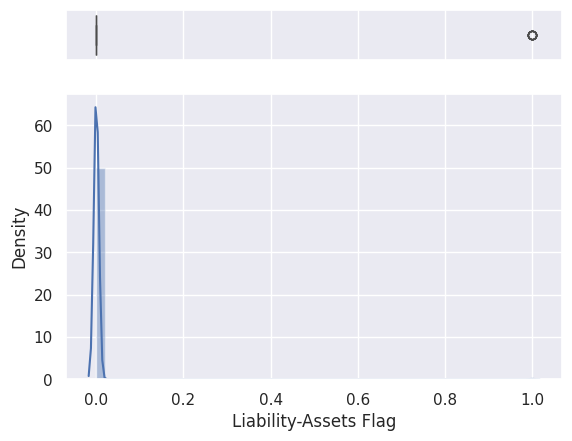

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Liability-Assets Flag"], orient = 'h', ax=ax_box)
sns.distplot(df["Liability-Assets Flag"], ax=ax_hist)
ax_hist.set(xlabel='Liability-Assets Flag')
plt.show()

Seems like there is only one value here?

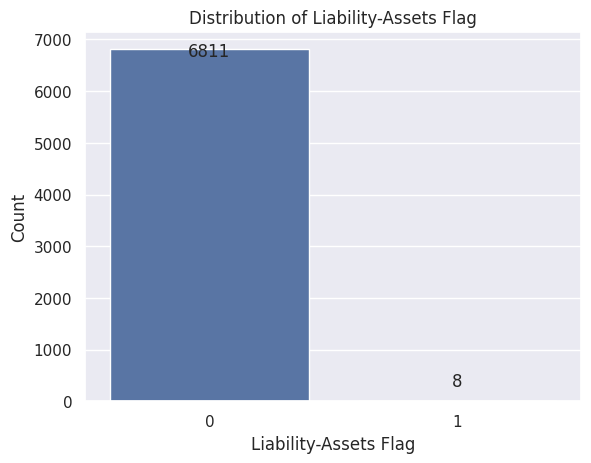

In [ ]:
sns.countplot(x=df['Liability-Assets Flag'], order=df['Liability-Assets Flag'].value_counts(ascending=False).index)
plt.title("Distribution of Liability-Assets Flag")
plt.xlabel("Liability-Assets Flag")
plt.ylabel("Count")
abs_values = df['Liability-Assets Flag'].value_counts(ascending=False).values
plt.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

This variable can only have the values of 0 or 1 as shown by the barplot

Text(0.5, 1.0, 'Distribution of Liability-Assets Flag, by Class')

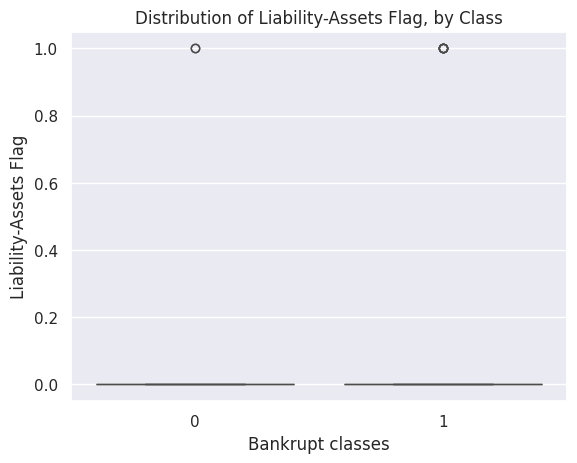

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Liability-Assets Flag")
plt.xlabel("Bankrupt classes")
plt.ylabel("Liability-Assets Flag")
plt.title("Distribution of Liability-Assets Flag, by Class")

#### Total Expense/Assets

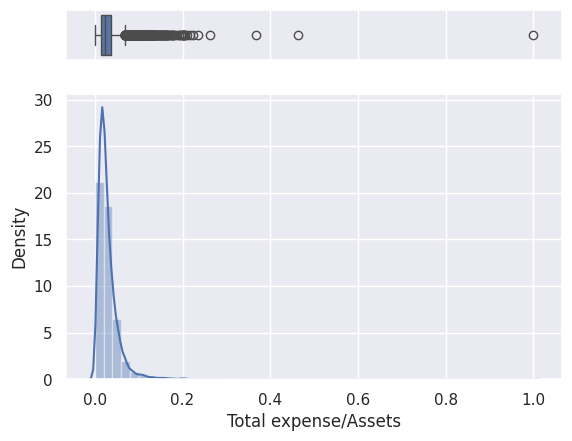

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Total expense/Assets"], orient = 'h', ax=ax_box)
sns.distplot(df["Total expense/Assets"], ax=ax_hist)
ax_hist.set(xlabel='Total expense/Assets')
plt.show()

Text(0.5, 1.0, 'Distribution of Total Expense/Assets, by Class')

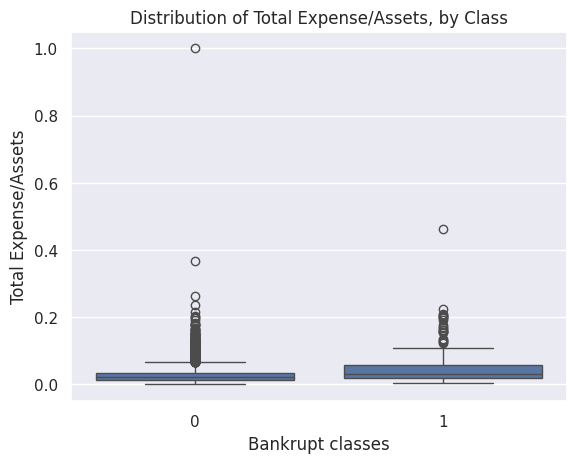

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Total expense/Assets")
plt.xlabel("Bankrupt classes")
plt.ylabel("Total Expense/Assets")
plt.title("Distribution of Total Expense/Assets, by Class")

#### Equity to Long-term Liability

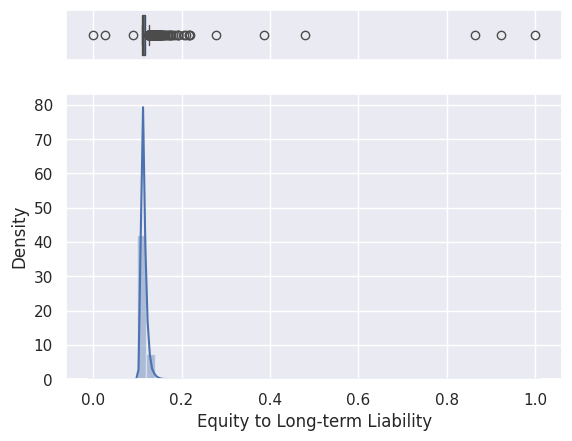

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Equity to Long-term Liability"], orient = 'h', ax=ax_box)
sns.distplot(df["Equity to Long-term Liability"], ax=ax_hist)
ax_hist.set(xlabel='Equity to Long-term Liability')
plt.show()

Text(0.5, 1.0, 'Distribution of Equity to Long-term Liability, by Class')

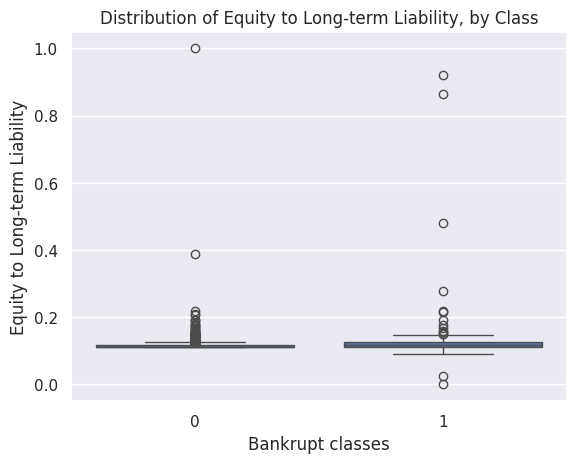

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Equity to Long-term Liability")
plt.xlabel("Bankrupt classes")
plt.ylabel("Equity to Long-term Liability")
plt.title("Distribution of Equity to Long-term Liability, by Class")

### More Factors Explored

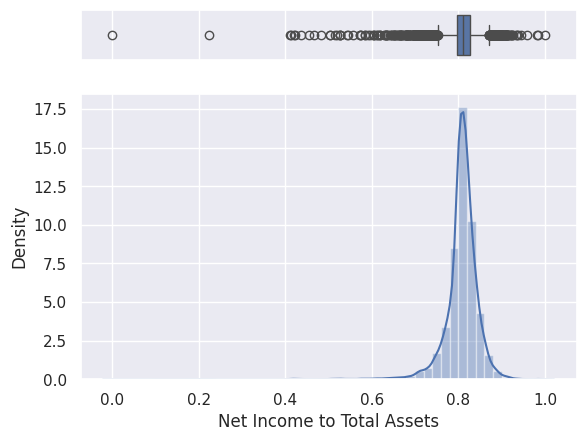

In [ ]:
# Distribution

# Cut the window in 2 parts
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(df["Net Income to Total Assets"], orient = 'h', ax=ax_box)
sns.distplot(df["Net Income to Total Assets"], ax=ax_hist)
ax_hist.set(xlabel='Net Income to Total Assets')
plt.show()

Text(0.5, 1.0, 'Distribution of Profit/ Net Income Ratio, by Class')

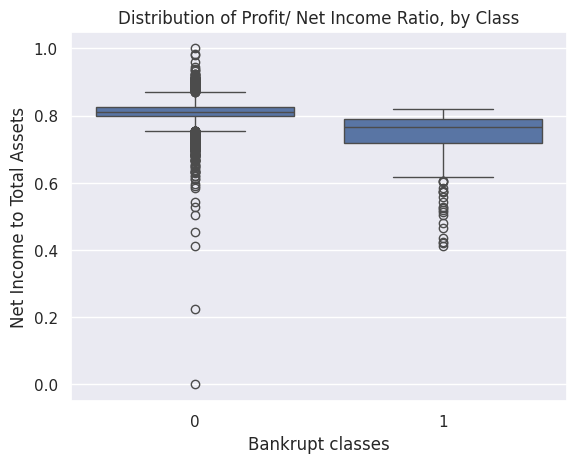

In [ ]:
# Distribution by Target Class (1 = bankrupt, 0 = not bankrupt)
sns.boxplot(data=df, x="Bankrupt?" , y="Net Income to Total Assets")
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class")

## Data Processing
Consists of preparation and partitioning

In [ ]:
pip install imbalanced-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Separate features and target variable
X = df.drop(columns=['Bankrupt?'])
y = df['Bankrupt?']


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets (80% train, 20% test) while maintaining the class imbalance
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# Show the shape of the partitions to confirm the split
(X_train.shape, X_test.shape, y_train.value_counts(), y_test.value_counts())

((5455, 95),
 (1364, 95),
 Bankrupt?
 0    5279
 1     176
 Name: count, dtype: int64,
 Bankrupt?
 0    1320
 1      44
 Name: count, dtype: int64)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data to balance classes
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the new class distribution for training data
train_class_distribution = y_train_balanced.value_counts()

# Apply SMOTE to the test data
X_test_balanced, y_test_balanced = smote.fit_resample(X_test, y_test)

# Check the new class distribution for test data
test_class_distribution = y_test_balanced.value_counts()

train_class_distribution, test_class_distribution

(Bankrupt?
 0    5279
 1    5279
 Name: count, dtype: int64,
 Bankrupt?
 0    1320
 1    1320
 Name: count, dtype: int64)

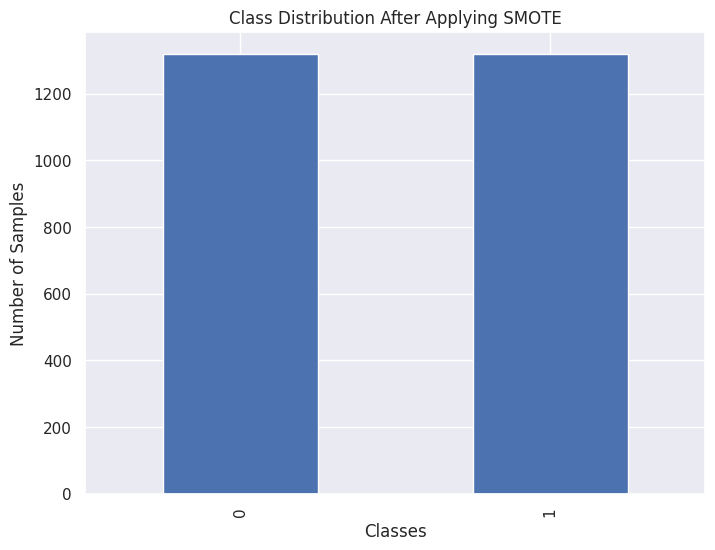

In [ ]:
import matplotlib.pyplot as plt

# Plotting the class distribution after SMOTE
plt.figure(figsize=(8, 6))
y_test_balanced.value_counts().plot(kind='bar')
plt.title("Class Distribution After Applying SMOTE")
plt.xlabel("Classes")
plt.ylabel("Number of Samples")
plt.show()

## Model Building

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}




## Performance Evaluation

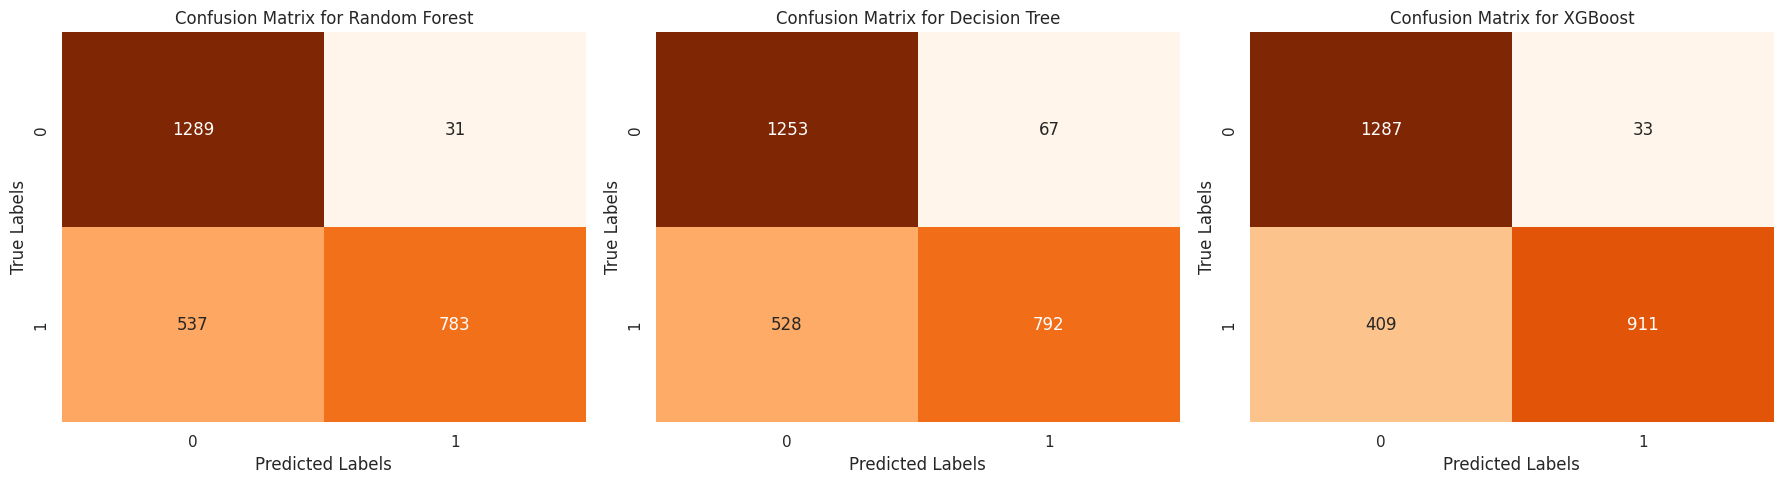

Model Performance Metrics:
               Accuracy Precision    Recall  F1 Score   ROC AUC
Random Forest  0.784848  0.961916  0.593182  0.733833  0.956141
Decision Tree  0.774621  0.922002       0.6  0.726939  0.774621
XGBoost        0.832576  0.965042  0.690152   0.80477   0.96466


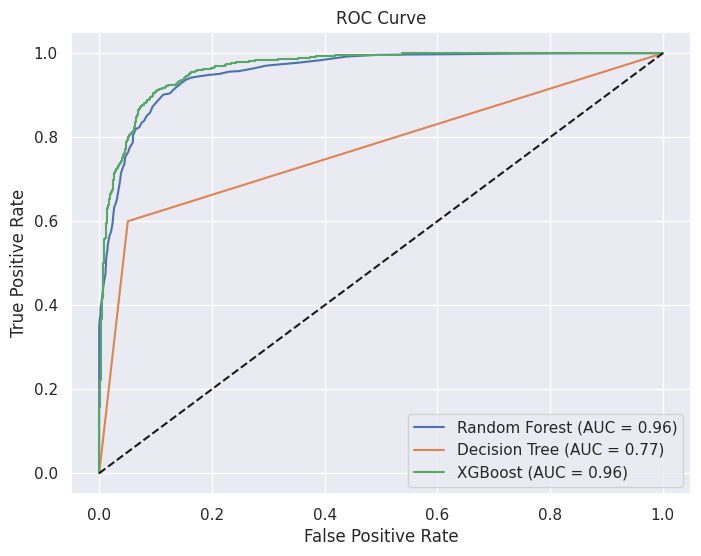

In [ ]:
# Train data with each chosen model
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test_balanced)
    y_pred_prob = model.predict_proba(X_test_balanced)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test_balanced))

    # Calculate metrics
    accuracy = accuracy_score(y_test_balanced, y_pred)
    precision = precision_score(y_test_balanced, y_pred)
    recall = recall_score(y_test_balanced, y_pred)
    f1 = f1_score(y_test_balanced, y_pred)
    auc = roc_auc_score(y_test_balanced, y_pred_prob)
    conf_matrix = confusion_matrix(y_test_balanced, y_pred)
results = {}
    # Store results
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": auc,
        "Confusion Matrix": conf_matrix
    }


num_models = len(models)
fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 5))  # Adjust width by number of models

for i, (model_name, metrics) in enumerate(results.items()):
    conf_matrix = metrics["Confusion Matrix"]

    # Plot each confusion matrix in a subplot
    ax = axes[i] if num_models > 1 else axes  # Handles case with single subplot
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Oranges", cbar=False, ax=ax)
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title(f"Confusion Matrix for {model_name}")

plt.tight_layout()
plt.show()

# Display model performance metrics
results_df = pd.DataFrame(results).T
results_df = results_df.drop(columns=["Confusion Matrix"])
print("Model Performance Metrics:")
print(results_df)

# Plot each ROC curve in a separate figure
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    y_pred_prob = model.predict_proba(X_test_balanced)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test_balanced))
    fpr, tpr, _ = roc_curve(y_test_balanced, y_pred_prob)
    auc = roc_auc_score(y_test_balanced, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Finalize ROC Curve plot
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()








## Model Comparison and Selection

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Predicting with test data and evaluating performance
for model_name, model in models.items():
    y_pred = model.predict(X_test_balanced)

    # Generate classification report
    report = classification_report(y_test_balanced, y_pred)
    print(f"Classification Report for {model_name}:\n{report}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.69      0.98      0.81      1320
           1       0.97      0.56      0.71      1320

    accuracy                           0.77      2640
   macro avg       0.83      0.77      0.76      2640
weighted avg       0.83      0.77      0.76      2640

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.70      0.95      0.80      1320
           1       0.92      0.59      0.72      1320

    accuracy                           0.77      2640
   macro avg       0.81      0.77      0.76      2640
weighted avg       0.81      0.77      0.76      2640

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85      1320
           1       0.97      0.69      0.80      1320

    accuracy                           0.83      2640
   macro av

In [ ]:
# import this library to explain model predictions and individual factor impact on output
import shap

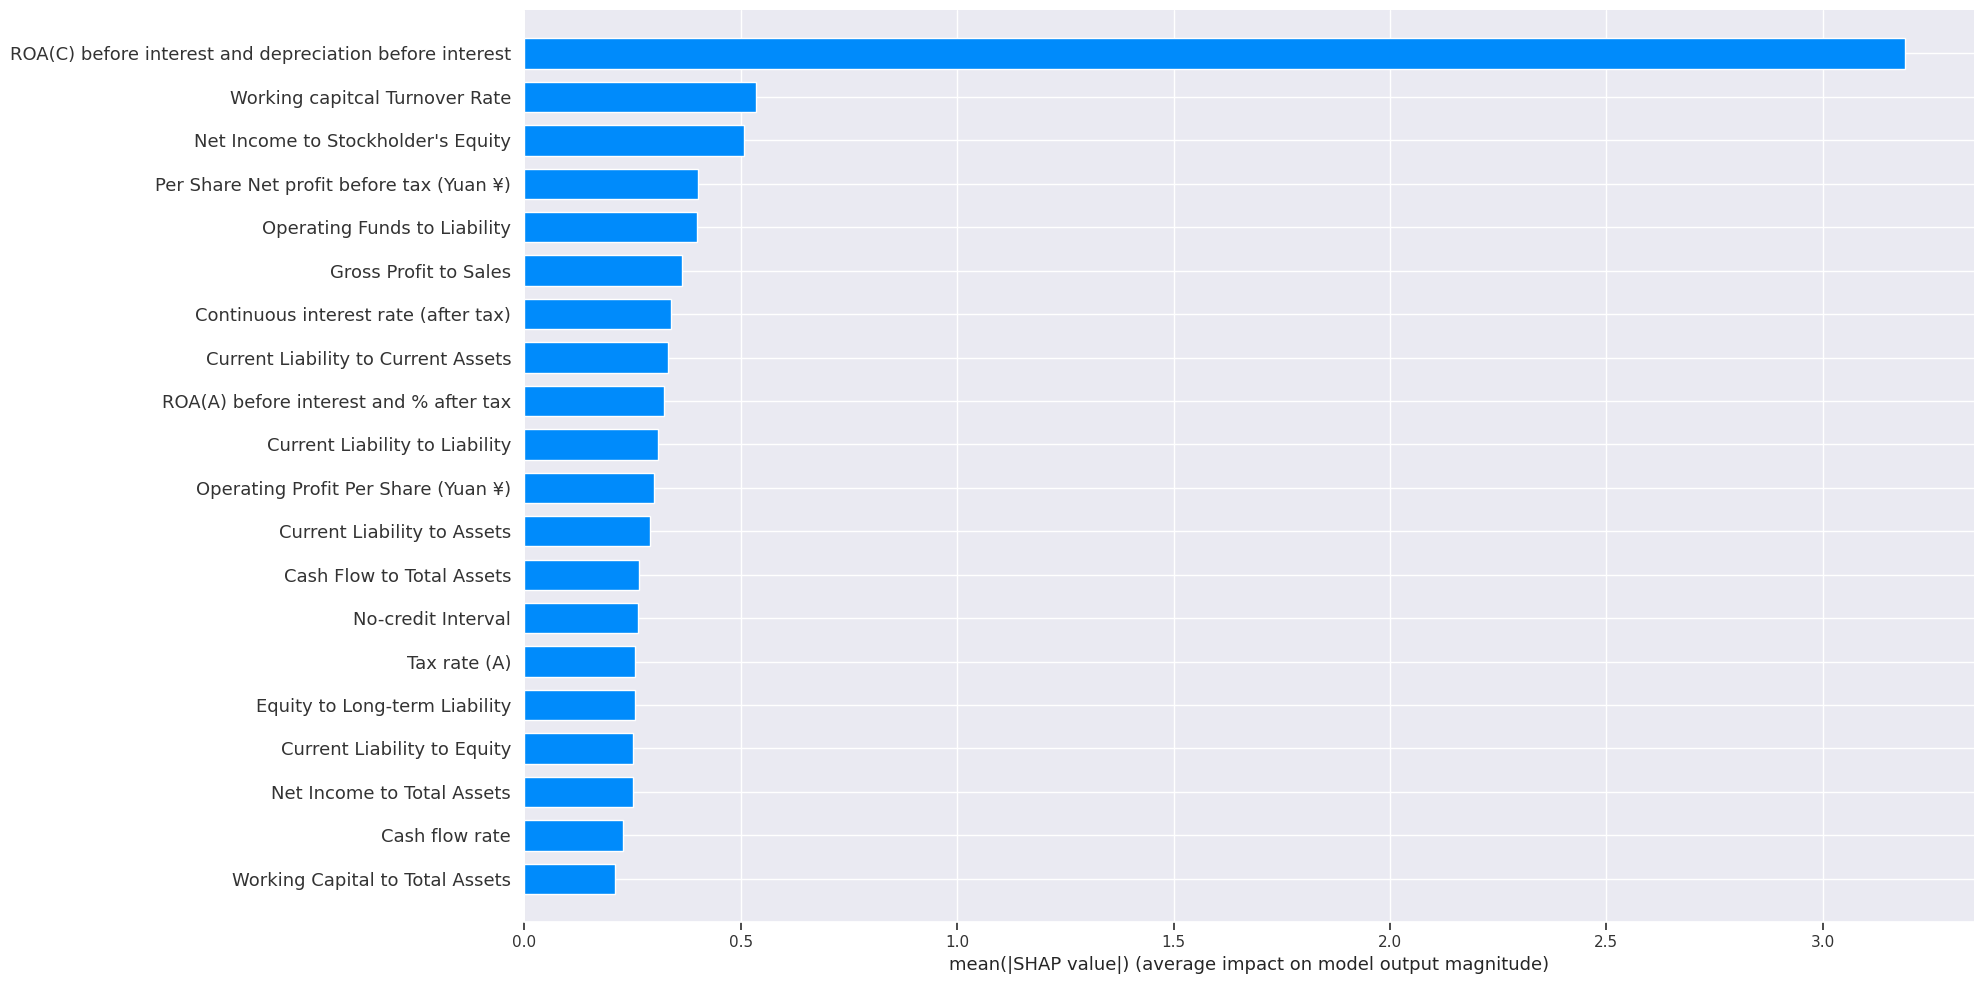

In [ ]:
model=models["XGBoost"]
explainer = shap.TreeExplainer(model)
explanation = explainer.shap_values(X_test_balanced)
shap.summary_plot(explanation, X_test_balanced,feature_names=X.columns,plot_type='bar',plot_size=(20,10))